## 트리

#### Maximum Depth of Binary Tree


Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

Constraints:

- The number of nodes in the tree is in the range [0, 104].
- -100 <= Node.val <= 100

Example 1:

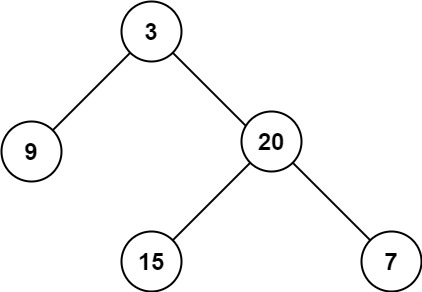 <br>
Input: root = [3,9,20,null,null,15,7]<br>
Output: 3

Example 2:

Input: root = [1,null,2]<br>
Output: 2

In [1]:
import collections
from typing import Optional

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        if root is None:
            return 0
        queue = collections.deque([root])
        depth = 0

        while queue:
            depth += 1
            for _ in range(len(queue)):
                current_root = queue.popleft()
                if current_root.left:
                    queue.append(current_root.left)
                if current_root.right:
                    queue.append(current_root.right)

        return depth

#### Longest Univalue Path


Given the root of a binary tree, return the length of the longest path, where each node in the path has the same value. This path may or may not pass through the root.

The length of the path between two nodes is represented by the number of edges between them.

Constraints:

- The number of nodes in the tree is in the range [0, 104].
- -1000 <= Node.val <= 1000
- The depth of the tree will not exceed 1000.

Example 1:

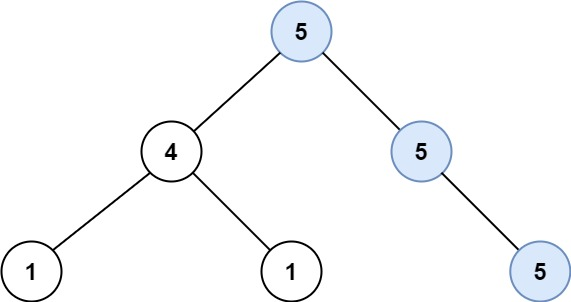 <br>
Input: root = [5,4,5,1,1,null,5] <br>
Output: 2 <br>
Explanation: The shown image shows that the longest path of the same value (i.e. 5).

Example 2:

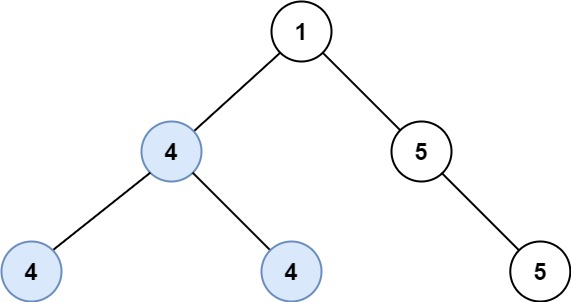 <br>
Input: root = [1,4,5,4,4,null,5] <br>
Output: 2 <br>
Explanation: The shown image shows that the longest path of the same value (i.e. 4).

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

class Solution:
    def longestUnivaluePath(self, root: Optional[TreeNode]) -> int:
        self.longest_path = 0

        def dfs(node):
            if not node:
                return 0
            
            left_length = dfs(node.left)
            right_length = dfs(node.right)

            left_arrow = right_arrow = 0

            if node.left and node.left.val == node.val:
                left_arrow = left_length + 1
            if node.right and node.right.val == node.val:
                right_arrow = right_length + 1
            self.longest_path = max(self.longest_path,left_arrow+right_arrow)

            return max(left_arrow, right_arrow)
        
        dfs(root)
        return self.longest_path

#### Balanced Binary Tree


Given a binary tree, determine if it is height-balanced.

Constraints:

- The number of nodes in the tree is in the range [0, 5000].
- -104 <= Node.val <= 104

Example 1:

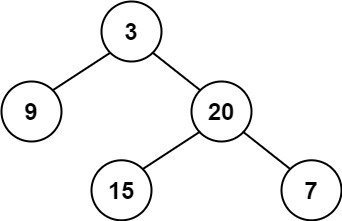 <br>
Input: root = [3,9,20,null,null,15,7] <br>
Output: true

Example 2:

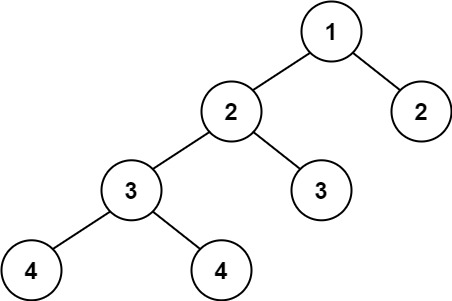 <br>
Input: root = [1,2,2,3,3,null,null,4,4] <br>
Output: false

Example 3:

Input: root = [] <br>
Output: true

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        def check_height(node):
            if not node:
                return 0
            left_height = check_height(node.left)
            right_height = check_height(node.right)

            if left_height == -1 or right_height == -1 or abs(left_height - right_height) > 1:
                return -1
            
            return max(left_height, right_height) + 1
        
        return check_height(root) != -1

#### Minimum Height Trees


A tree is an undirected graph in which any two vertices are connected by exactly one path. In other words, any connected graph without simple cycles is a tree.

Given a tree of n nodes labelled from 0 to n - 1, and an array of n - 1 edges where edges[i] = [ai, bi] indicates that there is an undirected edge between the two nodes ai and bi in the tree, you can choose any node of the tree as the root. When you select a node x as the root, the result tree has height h. Among all possible rooted trees, those with minimum height (i.e. min(h))  are called minimum height trees (MHTs).

Return a list of all MHTs' root labels. You can return the answer in any order.

The height of a rooted tree is the number of edges on the longest downward path between the root and a leaf.

Constraints:

- 1 <= n <= 2 * 104
- edges.length == n - 1
- 0 <= ai, bi < n
- ai != bi
- All the pairs (ai, bi) are distinct.
- The given input is guaranteed to be a tree and there will be no repeated edges.

Example 1:

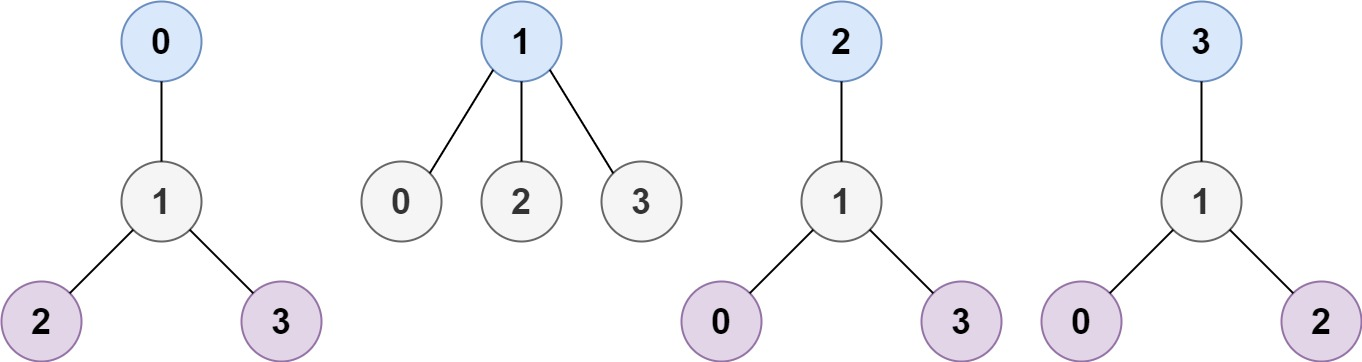<br>
Input: n = 4, edges = [[1,0],[1,2],[1,3]]<br>
Output: [1]<br>
Explanation: As shown, the height of the tree is 1 when the root is the node with label 1 which is the only MHT.

Example 2:

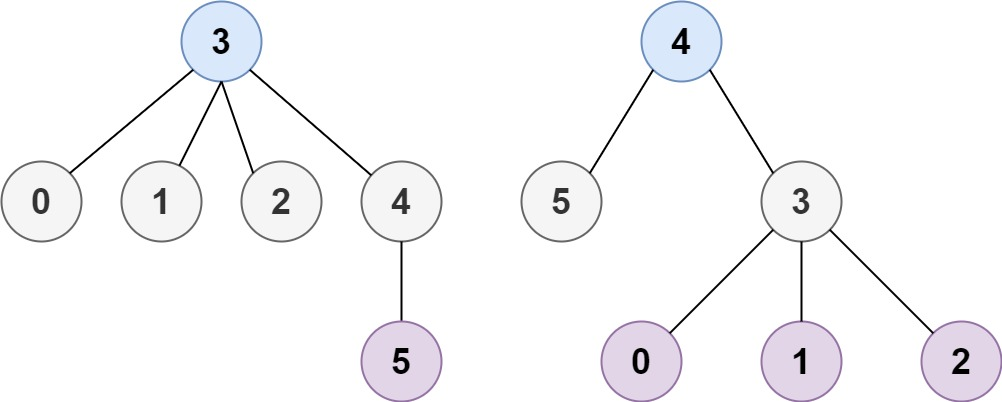<br>
Input: n = 6, edges = [[3,0],[3,1],[3,2],[3,4],[5,4]]<br>
Output: [3,4]

In [ ]:
from typing import List


class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if n <= 1:
            return [0]
        
        graph = collections.defaultdict(list)
        for i,j in edges:
            graph[i].append(j)
            graph[j].append(i)

        leaves = []
        for i in range(n+1):
            if len(graph[i]) == 1:
                leaves.append(i)

        while n > 2:
            n -= len(leaves)
            new_leaves = []

            for leaf in leaves:
                neighbor = graph[leaf].pop()
                graph[neighbor].remove(leaf)

                if len(graph[neighbor]) == 1:
                    new_leaves.append(neighbor)

            leaves = new_leaves

        return leaves

#### Binary Search Tree to Greater Sum Tree

Given the root of a Binary Search Tree (BST), convert it to a Greater Tree such that every key of the original BST is changed to the original key plus the sum of all keys greater than the original key in BST.

As a reminder, a binary search tree is a tree that satisfies these constraints:

- The left subtree of a node contains only nodes with keys less than the node's key.
- The right subtree of a node contains only nodes with keys greater than the node's key.
- Both the left and right subtrees must also be binary search trees.

Constraints:

- The number of nodes in the tree is in the range [1, 100].
- 0 <= Node.val <= 100
- All the values in the tree are unique.

Example 1:

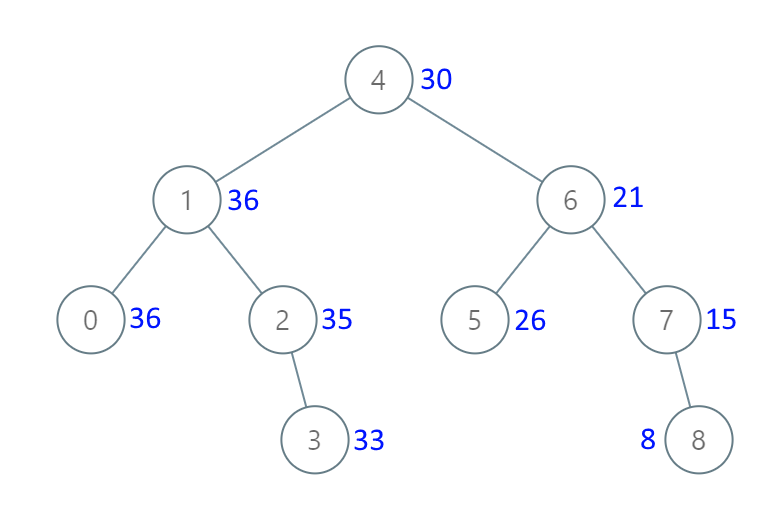 <br>
Input: root = [4,1,6,0,2,5,7,null,null,null,3,null,null,null,8] <br>
Output: [30,36,21,36,35,26,15,null,null,null,33,null,null,null,8]

Example 2:

Input: root = [0,null,1] <br>
Output: [1,null,1]

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def bstToGst(self, root: TreeNode) -> TreeNode:
        

#### Range Sum of BST


Given the root node of a binary search tree and two integers low and high, return the sum of values of all nodes with a value in the inclusive range [low, high].

Constraints:

- The number of nodes in the tree is in the range [1, 2 * 104].
- 1 <= Node.val <= 105
- 1 <= low <= high <= 105
- All Node.val are unique.

Example 1:

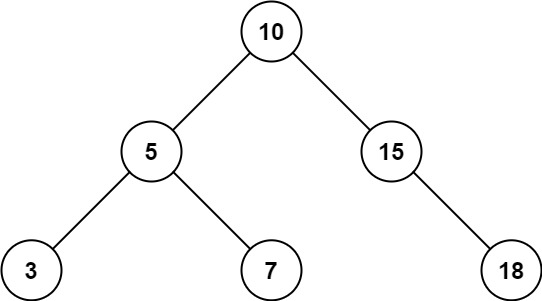 <br>
Input: root = [10,5,15,3,7,null,18], low = 7, high = 15 <br>
Output: 32 <br>
Explanation: Nodes 7, 10, and 15 are in the range [7, 15]. 7 + 10 + 15 = 32.

Example 2:

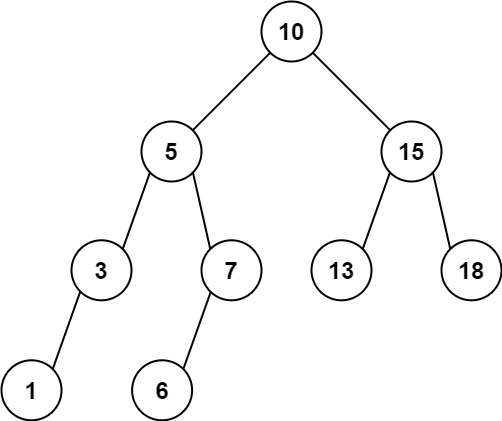 <br>
Input: root = [10,5,15,3,7,13,18,1,null,6], low = 6, high = 10 <br>
Output: 23 <br>
Explanation: Nodes 6, 7, and 10 are in the range [6, 10]. 6 + 7 + 10 = 23.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def rangeSumBST(self, root: Optional[TreeNode], low: int, high: int) -> int:
        self.answer = 0

        def dfs(node):
            if node:
                if low <= node.val <= high:
                    self.answer += node.value
                if low < node.val:
                    dfs(node.left)
                if node.val < high:
                    dfs(node.right)

        dfs(root)
        return self.answer